In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [3]:
file = "google_play_full.csv"

In [4]:
data = pd.read_csv(file, encoding='UTF-8')

C:\Users\Sarah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,3,4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.shape

(267052, 13)

# Data Cleansing Step

In [6]:
data_valid_installs = data.loc[data.Installs.apply(lambda x: "+" in x)]

In [7]:
data_valid_installs.Installs.value_counts()

10,000+           60531
1,000+            48880
100,000+          37498
5,000+            26360
50,000+           22795
100+              18502
500+              13919
1,000,000+        12853
500,000+           9847
10+                4427
50+                3871
10,000,000+        2821
5,000,000+         2804
5+                  671
1+                  445
50,000,000+         414
100,000,000+        283
0+                   52
500,000,000+         35
1,000,000,000+       24
5,000,000,000+        3
Name: Installs, dtype: int64

In [8]:
data_valid_installs.dtypes

Keep               object
App                object
Category           object
Rating             object
Reviews            object
Installs           object
Size               object
Price              object
Content Rating     object
Last Updated       object
Minimum Version    object
Latest Version     object
Unnamed: 12        object
dtype: object

In [9]:
data_valid_installs.Rating = data_valid_installs.Rating.astype(float)

C:\Users\Sarah\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
data_valid_installs.Reviews = data_valid_installs.Reviews.astype(float)

In [11]:
data_valid_installs.dtypes

Keep                object
App                 object
Category            object
Rating             float64
Reviews            float64
Installs            object
Size                object
Price               object
Content Rating      object
Last Updated        object
Minimum Version     object
Latest Version      object
Unnamed: 12         object
dtype: object

In [12]:
#Drop Unnamed columns of NaNs
#del data_valid_installs["Unnamed: 11"]
#del data_valid_installs["Unnamed: 12"]

In [13]:
data_valid_installs.dtypes

Keep                object
App                 object
Category            object
Rating             float64
Reviews            float64
Installs            object
Size                object
Price               object
Content Rating      object
Last Updated        object
Minimum Version     object
Latest Version      object
Unnamed: 12         object
dtype: object

In [14]:
data_valid_installs.Price.value_counts()

0           255429
$0.99         2317
$1.99         1552
$2.99         1351
$4.99          883
$3.99          767
$1.49          761
$2.49          518
$3.49          339
$9.99          275
$4.49          255
$5.99          224
$7.99          173
$6.99          171
$5.49          150
$8.99           84
$14.99          70
$6.49           68
$7.49           67
$19.99          55
$12.99          51
$10.99          50
$9.49           49
$1.00           48
$11.99          47
$24.99          45
$2.00           41
$29.99          39
$8.49           35
$15.99          31
             ...  
$11.41           1
$9.71            1
$8.43            1
$3.24            1
$18.60           1
$20.00           1
$4.80            1
$8.69            1
$26.90           1
$5.79            1
$2.30            1
$7.12            1
$1.44            1
$13.61           1
$100.00          1
$3.28            1
$5.90            1
$6.15            1
$11.10           1
$2.98            1
$8.47            1
$49.95      

In [15]:
#Create new column of Installs that have +'s and ,'s removed and converted into floats.
data_valid_installs["Installs_Numeric"] = data_valid_installs.Installs.apply(lambda x: float(x.replace("+", "").replace(",", "")))

C:\Users\Sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
data_valid_installs.dtypes

Keep                 object
App                  object
Category             object
Rating              float64
Reviews             float64
Installs             object
Size                 object
Price                object
Content Rating       object
Last Updated         object
Minimum Version      object
Latest Version       object
Unnamed: 12          object
Installs_Numeric    float64
dtype: object

In [17]:
data_valid_installs.head()

,Keep,App,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 12,Installs_Numeric
15,x,Xmax X,MUSIC_AND_AUDIO,4.468125,3702.0,"500,000+",21M,0,NaN,NaN,4.4 and up,9.1,NaN,500000.0
18,NaN,Bubble Shooter,GAME_PUZZLE,4.130435,23.0,0+,19M,0,Everyone,23-Oct-18,4.0 and up,1.0.0,NaN,0.0
19,NaN,DUA KE QURAN AMHARIC,EDUCATION,4.730337,89.0,0+,7.9M,0,Everyone,10-May-18,4.4 and up,1,NaN,0.0
20,NaN,Idram Merchant,FINANCE,5.000000,4.0,0+,2.9M,0,Everyone,10-Sep-18,4.0.3 and up,1,NaN,0.0
21,NaN,Vadaa Hunt,GAME_CASUAL,2.333333,3.0,0+,20M,0,Everyone,5-Dec-18,4.4 and up,1.0.4,NaN,0.0


In [18]:
def gameMapper(inCategory):
    if "GAME" in inCategory:
        return "GAME"
    else:
        return inCategory

data_valid_installs["GROUPED_CATEGORY"] = data_valid_installs.Category.apply(lambda x: gameMapper(x))

C:\Users\Sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


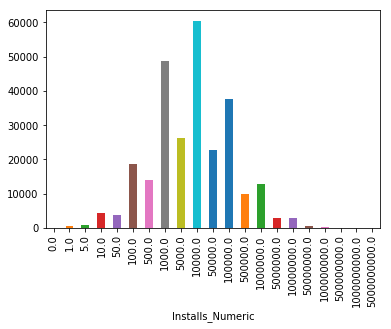

In [19]:
data_valid_installs.groupby("Installs_Numeric").count()["App"].plot(kind="bar")
plt.savefig('Installs_App_Count.png')

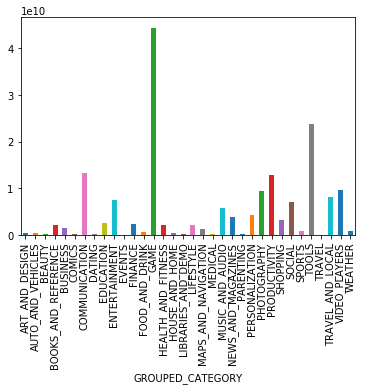

In [20]:
data_valid_installs.groupby("GROUPED_CATEGORY").sum()["Installs_Numeric"].plot(kind="bar")
plt.savefig('Category_Installs.png')

In [ ]:
# Reviews
data_valid_installs.groupby("Rating").count()["Installs_Numeric"].plot(kind="pie")

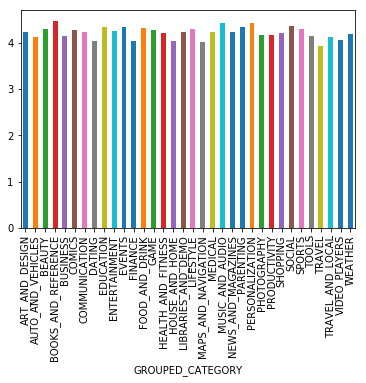

In [22]:
data_valid_installs.groupby("GROUPED_CATEGORY").mean()["Rating"].plot(kind="bar")
plt.savefig('Category_Rating.png')

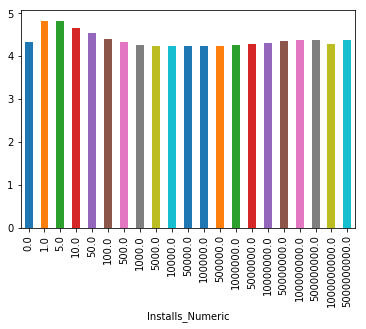

In [23]:
data_valid_installs.groupby("Installs_Numeric").mean()["Rating"].plot(kind="bar")
plt.savefig('Installs_Rating.png')

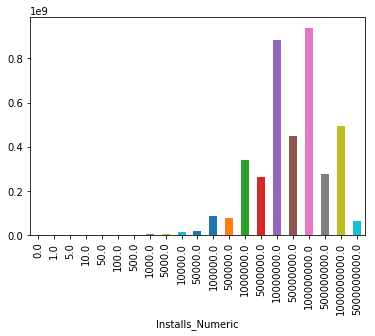

In [24]:
data_valid_installs.groupby("Installs_Numeric").sum()["Reviews"].plot(kind="bar")
plt.savefig('Installs_Reviews.png')

C:\Users\Sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


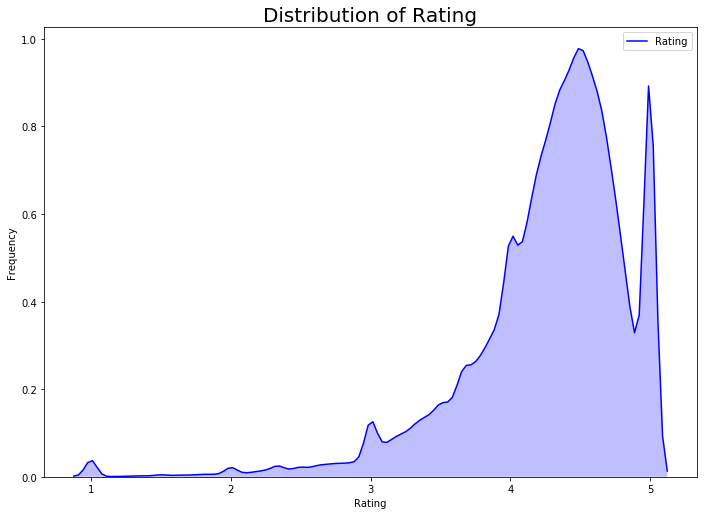

In [25]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data_valid_installs.Rating, color="blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.savefig('Dist_Rating.png')

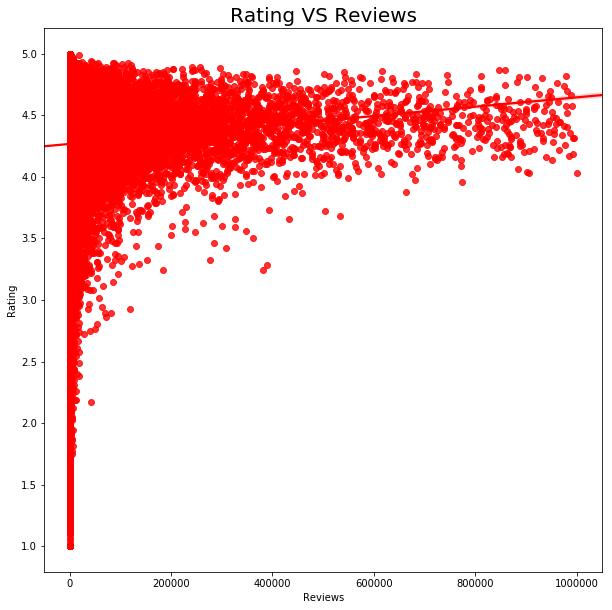

In [26]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'red',data=data_valid_installs[data_valid_installs['Reviews']<1000000]);
plt.title('Rating VS Reviews',size = 20)
plt.savefig('Ratings_vs_Reviews.png')